## Naive Bayes Crop Recommendation

### What is Naive Bayes?

Naive Bayes is a **probabilistic machine learning algorithm** based on **Bayes’ Theorem**.It predicts the class with the **highest posterior probability** given input features.The main idea behind the Naive Bayes classifier is to use Bayes' Theorem to classify data based on the probabilities of different classes given the features of the data. It is used mostly in high-dimensional text classification

***Posterior probability is the probability of a class after observing the data, calculated using Bayes’ theorem by combining prior probability and likelihood***.
---

### Bayes Theorem
Bayes’ Theorem provides a principled way to reverse conditional probabilities. It is defined as:

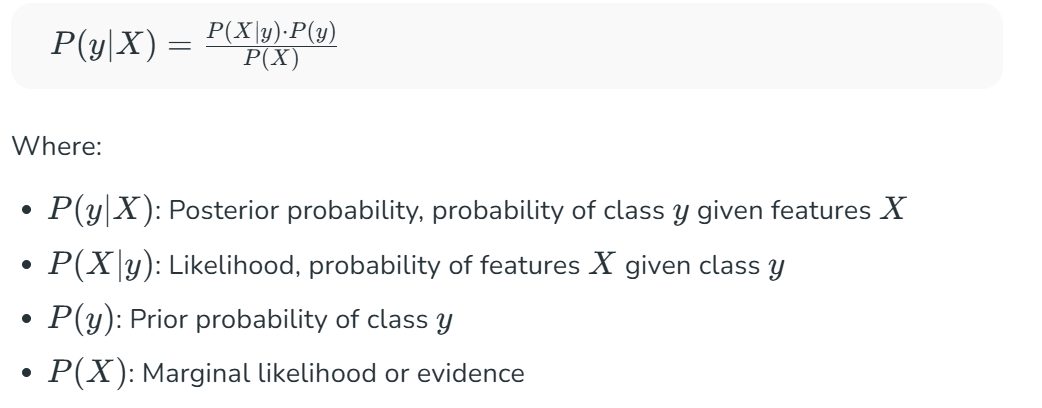


### Assumption of Naive Bayes

- Feature independence: This means that when we are trying to classify something, we assume that each feature (or piece of information) in the data does not affect any other feature.
- Continuous features are normally distributed: If a feature is continuous, then it is assumed to be normally distributed within each class.
- Discrete features have multinomial distributions: If a feature is discrete, then it is assumed to have a multinomial distribution within each class.
- Features are equally important: All features are assumed to contribute equally to the prediction of the class label.
- No missing data: The data should not contain any missing values.

### Gaussian Naive Bayes Formula

In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution. A Gaussian distribution is also called Normal distribution When plotted, it gives a bell shaped curve which is symmetric about the mean of the feature values as shown below:





### Multinomial Naive Bayes
Multinomial Naive Bayes is used when features represent the frequency of terms (such as word counts) in a document. It is commonly applied in text classification, where term frequencies are important.

#### Hand‑Calculated Naive Bayes Example (Step‑by‑Step)

### Problem : Predict crop for:
- **Temperature = 24°C**
- **Humidity = 80%**

Classes: **Rice**, **Wheat**

---

### Step 1: Prior Probabilities

| Crop | Samples | Prior P(C) |
|-----|--------|------------|
| Rice | 60 | 0.60 |
| Wheat | 40 | 0.40 |

---

### Step 2: Feature Statistics (from training data)

### Temperature

| Crop | Mean (μ) | Variance (σ²) |
|-----|---------|--------------|
| Rice | 22 | 4 |
| Wheat | 26 | 9 |

### Humidity

| Crop | Mean (μ) | Variance (σ²) |
|-----|---------|--------------|
| Rice | 82 | 4 |
| Wheat | 70 | 16 |

---

### Step 3: Likelihood Calculation

### Temperature Likelihood

\[
P(24|Rice) = 0.121
\]

\[
P(24|Wheat) = 0.106
\]

### Humidity Likelihood

\[
P(80|Rice) = 0.121
\]

\[
P(80|Wheat) = 0.020
\]

---

### Step 4: Posterior Probability

### Rice
\[
P(Rice|X) = 0.60 \times 0.121 \times 0.121 = 0.00878
\]

### Wheat
\[
P(Wheat|X) = 0.40 \times 0.106 \times 0.020 = 0.00085
\]

---

### Final Decision

| Crop | Posterior Probability |
|-----|----------------------|
| Rice | **0.00878** |
| Wheat | 0.00085 |

### **Predicted Crop = Rice**

This is exactly what **Gaussian Naive Bayes** computes internally.


### Let us Model complete data set using Python Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Load Dataset

In [2]:

df = pd.read_csv("Crop_recommendation.csv")
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Exploratory Data Analysis

In [3]:

df.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Import Data
Prep it (null, shape,delete, add)
Visualize
Model Training 
Model Predict
Model Evaluate 
Model Correction
Test it on New Data 
and finally deploy it for pilot 

In [6]:
df.describe(include="object")                              

,label
count,2200
unique,22
top,rice
freq,100


### We have 22 unique crops in our data with all crops having same percentage

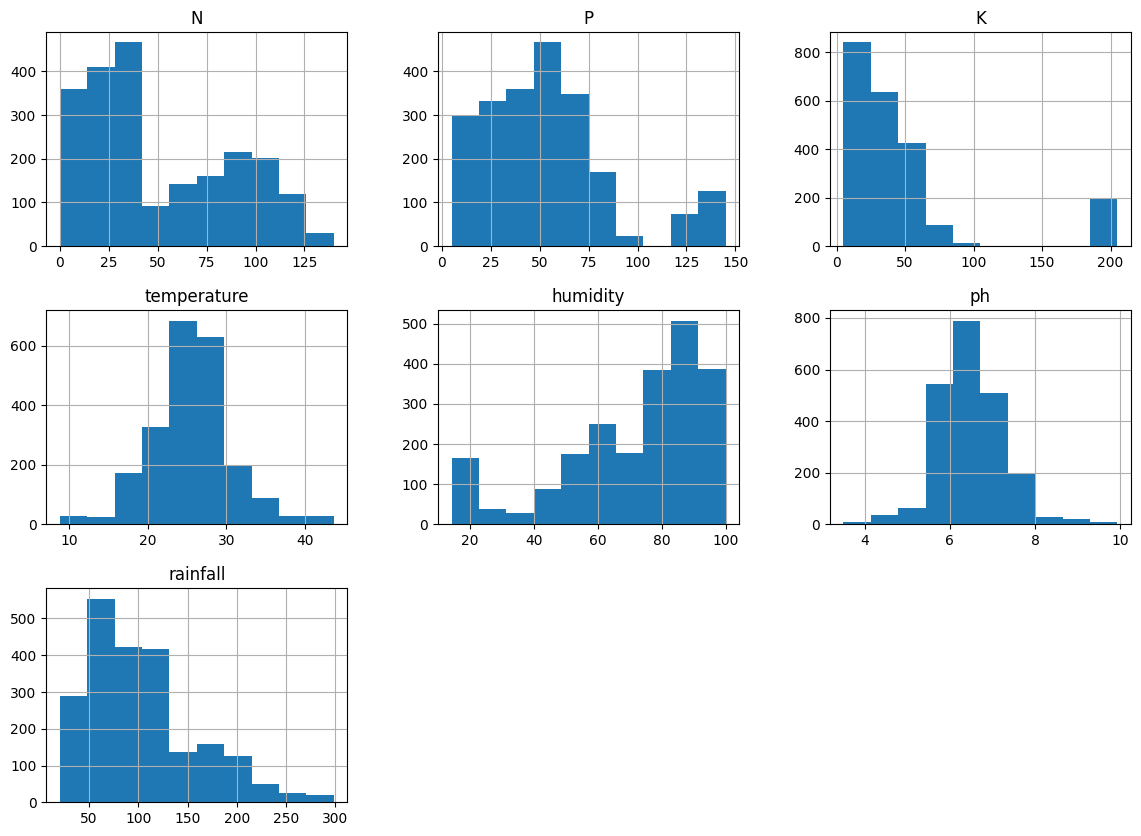

In [4]:

df.hist(figsize=(14,10))
plt.show()


## Correlation Heatmap

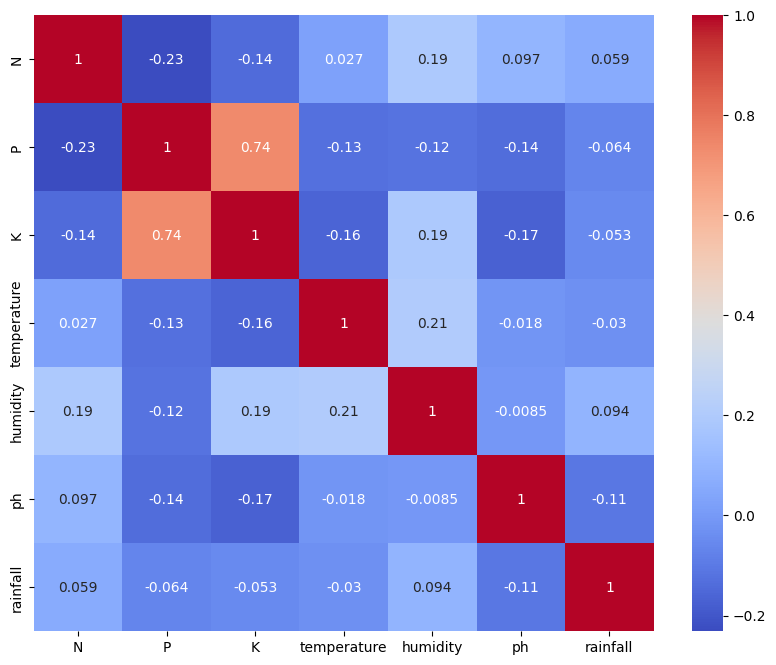

In [7]:

plt.figure(figsize=(10,8))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()


## Feature – Label Split

In [8]:

X = df.drop("label", axis=1)
y = df["label"]


## Train Test Split

In [9]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Model Training

In [10]:

model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

## Model Evaluation

In [11]:

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        2

## Prediction on New Data

In [12]:

new_data = pd.DataFrame({
    "N": [85],
    "P": [40],
    "K": [45],
    "temperature": [22],
    "humidity": [81],
    "ph": [6.8],
    "rainfall": [210]
})

model.predict(new_data)


array(['rice'], dtype='<U11')

## Rework on this sheet and share
- Insights after every block 
- Select only not correlated features 
- Add few more visuals 
- Name your Model as Crop_Pred
- Update this using K-Fold